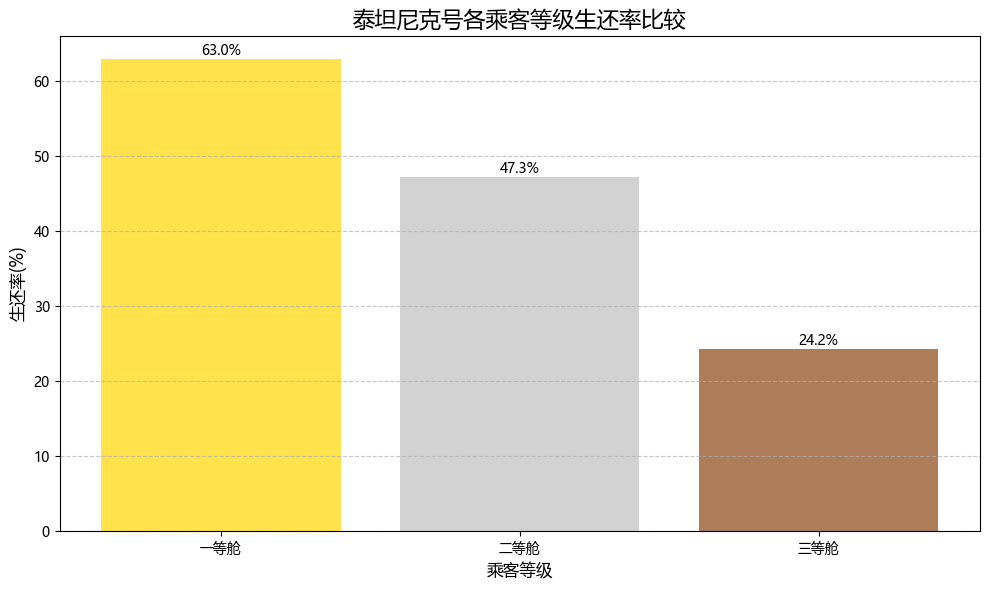


各等级生还情况统计:
     生还人数  总人数     生还率(%)
一等舱   136  216  62.962963
二等舱    87  184  47.282609
三等舱   119  491  24.236253


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
plt.rcParams['axes.unicode_minus'] = False

# 读取数据
df = pd.read_csv('train.csv')

# 计算各等级的乘客总数和生还人数
class_survival = df.groupby('Pclass')['Survived'].agg(['sum', 'count'])
class_survival['survival_rate'] = class_survival['sum'] / class_survival['count'] * 100

# 重命名索引和列名
class_survival.index = ['一等舱', '二等舱', '三等舱']
class_survival.columns = ['生还人数', '总人数', '生还率(%)']

# 创建图表
plt.figure(figsize=(10, 6))

# 绘制生还率直方图
bars = plt.bar(class_survival.index, class_survival['生还率(%)'],
               color=['gold', 'silver', 'saddlebrown'], alpha=0.7)

# 添加数据标签
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}%', ha='center', va='bottom')

# 添加标题和标签
plt.title('泰坦尼克号各乘客等级生还率比较', fontsize=16)
plt.xlabel('乘客等级', fontsize=12)
plt.ylabel('生还率(%)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 显示图表
plt.tight_layout()
plt.show()

# 打印详细数据
print("\n各等级生还情况统计:")
print(class_survival)